# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.inspection import permutation_importance

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Prep

In [ ]:
# Ubah spasi kosong menjadi NaN sebelum konversi ke numerik
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Lakukan konversi ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Isi NaN yang muncul akibat spasi dengan nilai dari MonthlyCharges
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

# Pemetaan Churn menjadi 0 dan 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})

columns_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

encoded_columns = [col for col in df.columns if any(prefix in col for prefix in columns_to_encode)]
df[encoded_columns] = df[encoded_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

<ipython-input-3-764c560285e0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)


In [ ]:
df=df.drop(columns='customerID')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

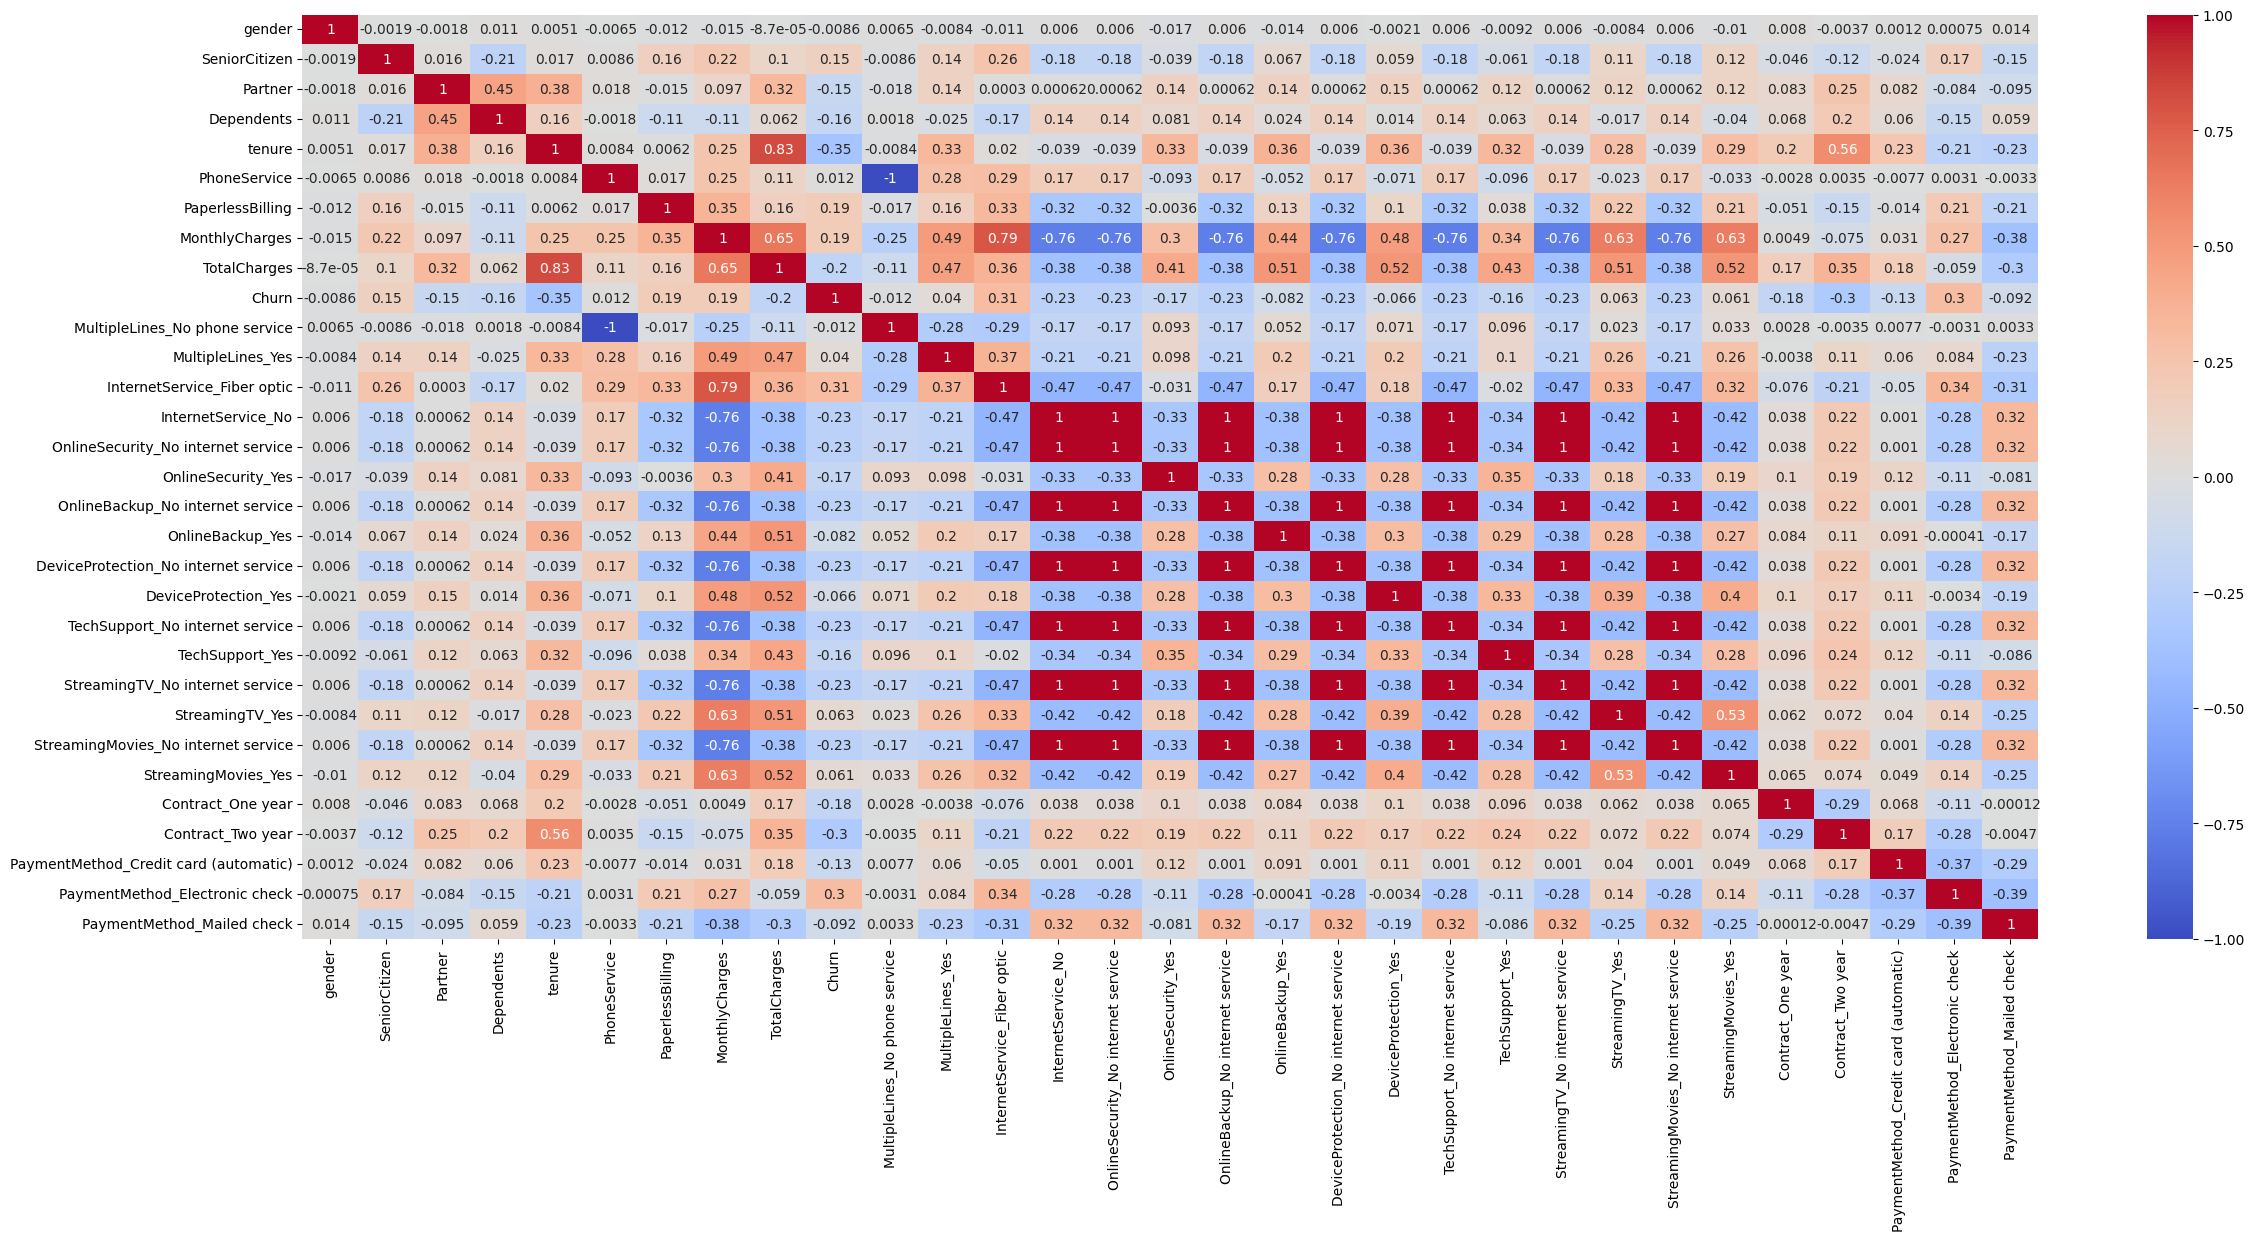

In [ ]:
corr = df.corr()
plt.figure(figsize=(28,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Hapus Multikolionaritas Fitur

In [ ]:
columns_to_drop = [
    'MultipleLines_No phone service',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]
df = df.drop(columns=columns_to_drop)

<Axes: >

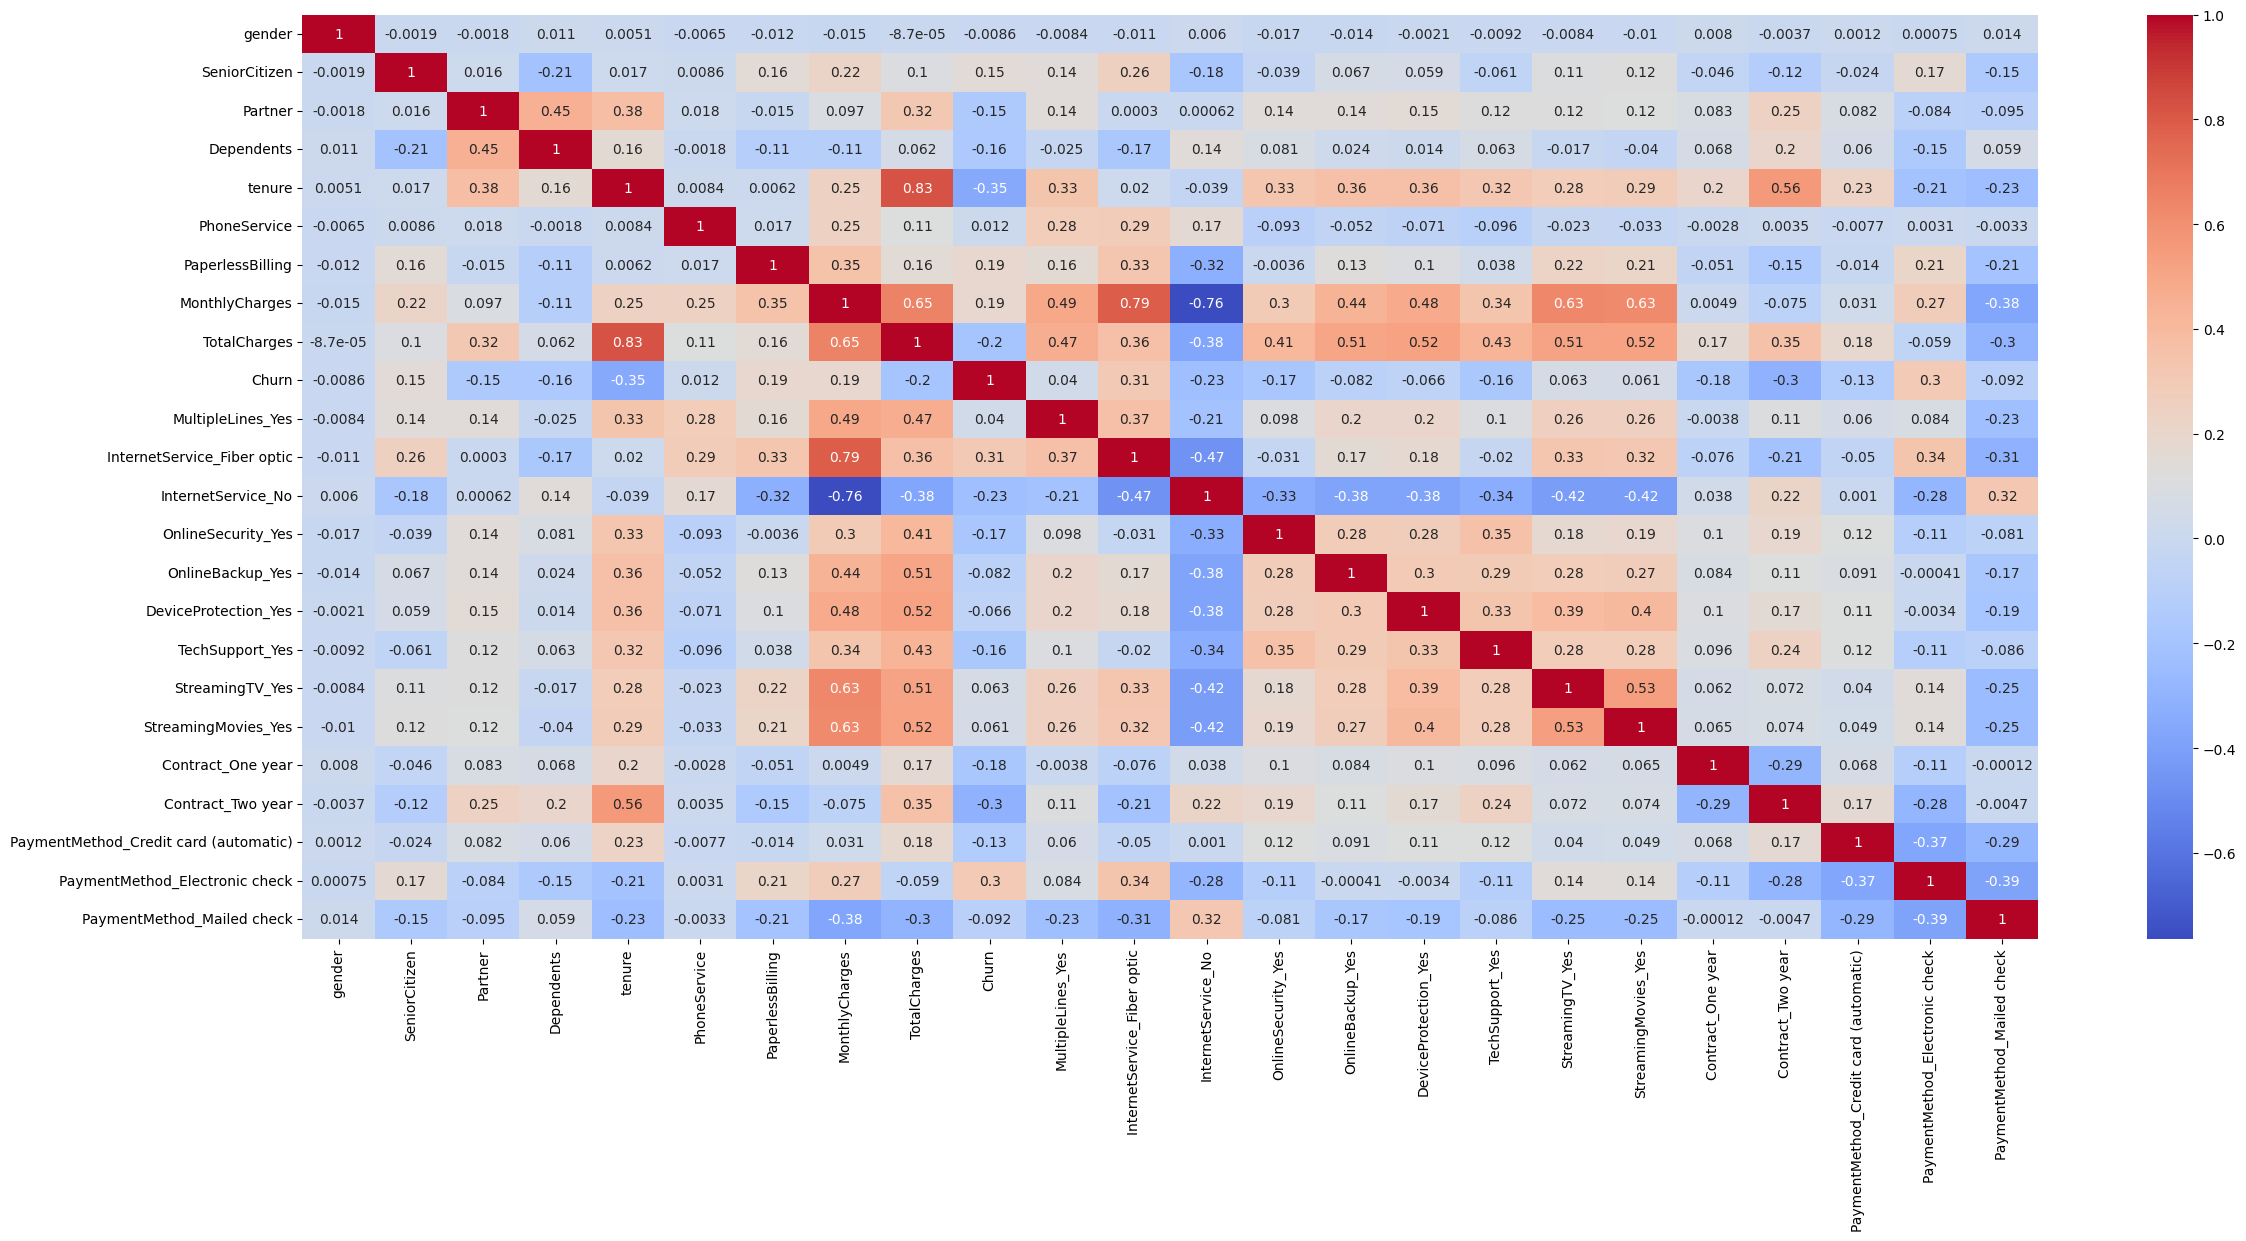

In [ ]:
corr = df.corr()
plt.figure(figsize=(28,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 23), (1409, 23), (5634,), (1409,))

## Feature Engineering

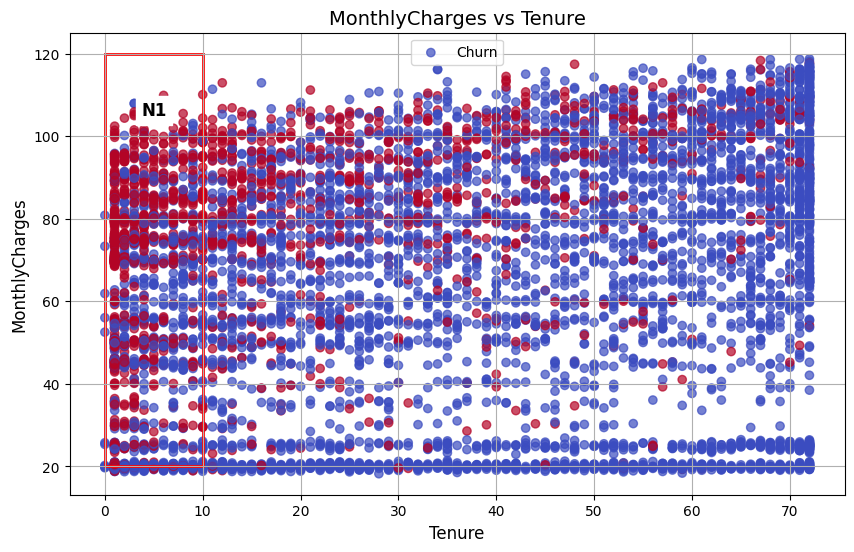

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['Churn'], cmap='coolwarm', label='Churn', alpha=0.7)

plt.text(5, 105, 'N1', fontsize=12, ha='center', color='black', fontweight='bold', backgroundcolor='white')

plt.gca().add_patch(plt.Rectangle((0, 20), 10, 100, linewidth=2, edgecolor='red', facecolor='none'))

plt.title('MonthlyCharges vs Tenure', fontsize=14)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('MonthlyCharges', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Menentukan kondisi untuk Tenure 0-10 dan Monthly Charges 0-120
condition_1 = (X_train['tenure'] >= 0) & (X_train['tenure'] <= 10) & (X_train['MonthlyCharges'] >= 0) & (X_train['MonthlyCharges'] <= 120)
churn_1 = y_train[condition_1]
churn_1_0 = (churn_1 == 0).sum()  # Jumlah churn 0
churn_1_1 = (churn_1 == 1).sum()  # Jumlah churn 1
persentase_churn_1 = (churn_1_1 / len(churn_1)) * 100

# Menentukan kondisi untuk Tenure 0-20 dan Monthly Charges 65-120
condition_2 = (X_train['tenure'] >= 0) & (X_train['tenure'] <= 20) & (X_train['MonthlyCharges'] >= 65) & (X_train['MonthlyCharges'] <= 120)
churn_2 = y_train[condition_2]
churn_2_0 = (churn_2 == 0).sum()  # Jumlah churn 0
churn_2_1 = (churn_2 == 1).sum()  # Jumlah churn 1
persentase_churn_2 = (churn_2_1 / len(churn_2)) * 100

# Menentukan kondisi untuk Tenure 0-40 dan Monthly Charges 65-120
condition_3 = (X_train['tenure'] >= 0) & (X_train['tenure'] <= 40) & (X_train['MonthlyCharges'] >= 65) & (X_train['MonthlyCharges'] <= 120)
churn_3 = y_train[condition_3]
churn_3_0 = (churn_3 == 0).sum()  # Jumlah churn 0
churn_3_1 = (churn_3 == 1).sum()  # Jumlah churn 1
persentase_churn_3 = (churn_3_1 / len(churn_3)) * 100

print(f"Jumlah churn untuk Tenure 0-10 dan Monthly Charge 0-120:")
print(f"Churn 0: {churn_1_0}, Churn 1: {churn_1_1}")
print(f"Persentase churn 1: {persentase_churn_1:.2f}%")
print("\n")

print(f"Jumlah churn untuk Tenure 0-20 dan Monthly Charge 65-120:")
print(f"Churn 0: {churn_2_0}, Churn 1: {churn_2_1}")
print(f"Persentase churn 1: {persentase_churn_2:.2f}%")
print("\n")

print(f"Jumlah churn untuk Tenure 0-40 dan Monthly Charge 65-120:")
print(f"Churn 0: {churn_3_0}, Churn 1: {churn_3_1}")
print(f"Persentase churn 1: {persentase_churn_3:.2f}%")

Jumlah churn untuk Tenure 0-10 dan Monthly Charge 0-120:
Churn 0: 799, Churn 1: 767
Persentase churn 1: 48.98%


Jumlah churn untuk Tenure 0-20 dan Monthly Charge 65-120:
Churn 0: 424, Churn 1: 649
Persentase churn 1: 60.48%


Jumlah churn untuk Tenure 0-40 dan Monthly Charge 65-120:
Churn 0: 841, Churn 1: 860
Persentase churn 1: 50.56%


In [ ]:
condition = (df['tenure'] >= 0) & (df['tenure'] <= 20) & (df['MonthlyCharges'] >= 65) & (df['MonthlyCharges'] <= 120)

df['Grup'] = 0  # Default nilai 0
df.loc[condition, 'Grup'] = 1  # Mengatur nilai 1 jika memenuhi kondisi

print("Dataframe dengan kolom Grup:")
print(df[['tenure', 'MonthlyCharges', 'Grup']].head())

Dataframe dengan kolom Grup:
   tenure  MonthlyCharges  Grup
0       1           29.85     0
1      34           56.95     0
2       2           53.85     0
3      45           42.30     0
4       2           70.70     1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

## split

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalisasi

In [ ]:
scaler = StandardScaler()

columns_to_normalize = ['MonthlyCharges', 'TotalCharges']
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Grup
2142,0,0,0,1,21,1,0,-0.000474,-0.419967,0,...,1,0,0,1,1,0,0,0,1,0
1623,0,0,0,0,54,1,1,1.074754,1.256024,1,...,0,0,1,1,0,1,0,0,0,0
6074,1,0,1,0,1,0,1,-1.376499,-1.000343,0,...,0,0,0,0,0,0,0,1,0,0
1362,1,0,0,0,4,1,1,0.177346,-0.905555,0,...,0,0,0,0,0,0,0,1,0,1
6754,1,0,0,1,0,1,1,-0.098524,-0.983352,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Grup
185,0,0,1,0,1,0,1,-1.331629,-0.999747,0,...,0,0,0,0,0,0,0,1,0,0
2715,1,0,0,0,41,1,1,-1.316672,-0.570369,1,...,0,0,0,0,0,0,0,0,0,0
3825,0,0,1,1,52,1,0,-1.512772,-0.554792,0,...,0,0,0,0,0,1,0,0,1,0
1807,0,0,0,0,1,1,0,0.381756,-0.976966,0,...,1,0,0,0,0,0,0,1,0,1
132,1,0,0,0,67,1,0,-0.475768,0.429949,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
def eval_classification(model):
    # Prediksi pada data test dan training
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    # Evaluasi pada Test Set
    print("Accuracy (Test Set): %.4f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.4f" % accuracy_score(y_train, y_pred_train))

    print("Precision (Test Set): %.4f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.4f" % precision_score(y_train, y_pred_train))

    print("Recall (Test Set): %.4f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.4f" % recall_score(y_train, y_pred_train))

    print("F1-Score (Test Set): %.4f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.4f" % f1_score(y_train, y_pred_train))

    print("ROC-AUC (Test Set): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC-AUC (Train Set): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    # Cross-validation untuk recall pada train dan test set
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Cross-validated Test Set): {:.4f}'.format(score['test_score'].mean()))
    print('Recall (Cross-validated Train Set): {:.4f}'.format(score['train_score'].mean()))

    # Precision di Cross-Validation
    score_precision = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('Precision (Cross-validated Test Set): {:.4f}'.format(score_precision['test_score'].mean()))
    print('Precision (Cross-validated Train Set): {:.4f}'.format(score_precision['train_score'].mean()))

def show_feature_importance(model):
    # Menampilkan 25 fitur terpenting
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')
    plt.show()

def show_best_hyperparameter(model):
    # Menampilkan hyperparameter terbaik setelah tuning
    print(model.best_estimator_.get_params())

# Modelling 1

## Adaboost

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
eval_classification(adaboost)

Accuracy (Test Set): 0.8190
Accuracy (Train Set): 0.7998
Precision (Test Set): 0.6903
Precision (Train Set): 0.6606
Recall (Test Set): 0.5737
Recall (Train Set): 0.5060
F1-Score (Test Set): 0.6266
F1-Score (Train Set): 0.5731
ROC-AUC (Test Set): 0.8586
ROC-AUC (Train Set): 0.8477
Recall (Cross-validated Test Set): 0.5265
Recall (Cross-validated Train Set): 0.5301
Precision (Cross-validated Test Set): 0.6611
Precision (Cross-validated Train Set): 0.6689


## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
eval_classification(gb)

Accuracy (Test Set): 0.8112
Accuracy (Train Set): 0.8230
Precision (Test Set): 0.6814
Precision (Train Set): 0.7131
Recall (Test Set): 0.5389
Recall (Train Set): 0.5582
F1-Score (Test Set): 0.6018
F1-Score (Train Set): 0.6262
ROC-AUC (Test Set): 0.8620
ROC-AUC (Train Set): 0.8758
Recall (Cross-validated Test Set): 0.5302
Recall (Cross-validated Train Set): 0.5693
Precision (Cross-validated Test Set): 0.6660
Precision (Cross-validated Train Set): 0.7139


## Ridge Classifier

In [ ]:
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train, y_train)
train_accuracy = ridge.score(X_train, y_train)
test_accuracy = ridge.score(X_test, y_test)
train_recall = recall_score(y_train, ridge.predict(X_train))
test_recall = recall_score(y_test, ridge.predict(X_test))
train_precision = precision_score(y_train, ridge.predict(X_train))
test_precision = precision_score(y_test, ridge.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train Precision: {train_precision:.4f}")

Test Accuracy: 0.8219
Train Accuracy: 0.7962
Test Recall: 0.5603
Train Recall: 0.4913
Test Precision: 0.7061
Train Precision: 0.6551


## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
eval_classification(nb)

Accuracy (Test Set): 0.7708
Accuracy (Train Set): 0.7547
Precision (Test Set): 0.5465
Precision (Train Set): 0.5271
Recall (Test Set): 0.7882
Recall (Train Set): 0.7420
F1-Score (Test Set): 0.6454
F1-Score (Train Set): 0.6163
ROC-AUC (Test Set): 0.8500
ROC-AUC (Train Set): 0.8272
Recall (Cross-validated Test Set): 0.7464
Recall (Cross-validated Train Set): 0.7472
Precision (Cross-validated Test Set): 0.5334
Precision (Cross-validated Train Set): 0.5344


## Logreg

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.8204
Accuracy (Train Set): 0.8037
Precision (Test Set): 0.6863
Precision (Train Set): 0.6578
Recall (Test Set): 0.5925
Recall (Train Set): 0.5434
F1-Score (Test Set): 0.6360
F1-Score (Train Set): 0.5952
ROC-AUC (Test Set): 0.8625
ROC-AUC (Train Set): 0.8445


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Recall (Cross-validated Test Set): 0.5511
Recall (Cross-validated Train Set): 0.5523


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precision (Cross-validated Test Set): 0.6580
Precision (Cross-validated Train Set): 0.6631


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Modelling 2

In [ ]:
count_class_0 = y_train.value_counts()[0]

smote_50_50 = SMOTE(sampling_strategy={1: count_class_0})  # 50:50
smote_50_40 = SMOTE(sampling_strategy={1: int(count_class_0 * 0.8)})  # 50:40
smote_50_30 = SMOTE(sampling_strategy={1: int(count_class_0 * 0.6)})  # 50:30

X_train_resampled_50_50, y_train_resampled_50_50 = smote_50_50.fit_resample(X_train, y_train)
X_train_resampled_50_40, y_train_resampled_50_40 = smote_50_40.fit_resample(X_train, y_train)
X_train_resampled_50_30, y_train_resampled_50_30 = smote_50_30.fit_resample(X_train, y_train)

print("50:50 Balance (training):\n", y_train_resampled_50_50.value_counts())
print("50:40 Balance (training):\n", y_train_resampled_50_40.value_counts())
print("50:30 Balance (training):\n", y_train_resampled_50_30.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

50:50 Balance (training):
 Churn
0    4138
1    4138
Name: count, dtype: int64
50:40 Balance (training):
 Churn
0    4138
1    3310
Name: count, dtype: int64
50:30 Balance (training):
 Churn
0    4138
1    2482
Name: count, dtype: int64


## SMOTE

In [ ]:
# Inisialisasi classifier dasar
base_models = [
    ('lr', LogisticRegression()),  # Perbaikan penulisan
    ('ada', AdaBoostClassifier(n_estimators=150, learning_rate=0.5, random_state=42)),
    ('ridge', RidgeClassifier()),
    ('gbc', GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=4, random_state=42)),
    ('rf', RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)),
    ('lda', LinearDiscriminantAnalysis()),
    ('xgboost', XGBClassifier(n_estimators=90, max_depth=4, learning_rate=0.2, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('qda', QuadraticDiscriminantAnalysis()),
    ('nb', GaussianNB()),
    ('dummy', DummyClassifier(strategy="most_frequent")),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(kernel='linear', random_state=42))
]

# Meta-model Logistic Regression
meta_model = LogisticRegression()

# Model Stacking
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [ ]:
# Function to evaluate individual models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    performance = []

    for name, model in models:
        model.fit(X_train, y_train)
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        performance.append([name, train_acc, test_acc])

    return performance

In [ ]:
base_model_performance = evaluate_models(base_models, X_train, y_train, X_test, y_test)
performance_base = pd.DataFrame(base_model_performance, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
performance_base = performance_base.sort_values(by='Test Accuracy', ascending=False)
performance_base

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy,Test Accuracy
2,ridge,0.796237,0.821859
0,lr,0.802982,0.821150
5,lda,0.797657,0.819021
3,gbc,0.853745,0.814053
1,ada,0.800674,0.812633
6,xgboost,0.847000,0.811214
7,et,0.788960,0.804826
4,rf,0.790025,0.797729
13,svm,0.774405,0.793471
10,nb,0.754704,0.770759


<ipython-input-104-d338e1391feb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy', data=performance_base, palette='Blues_d')


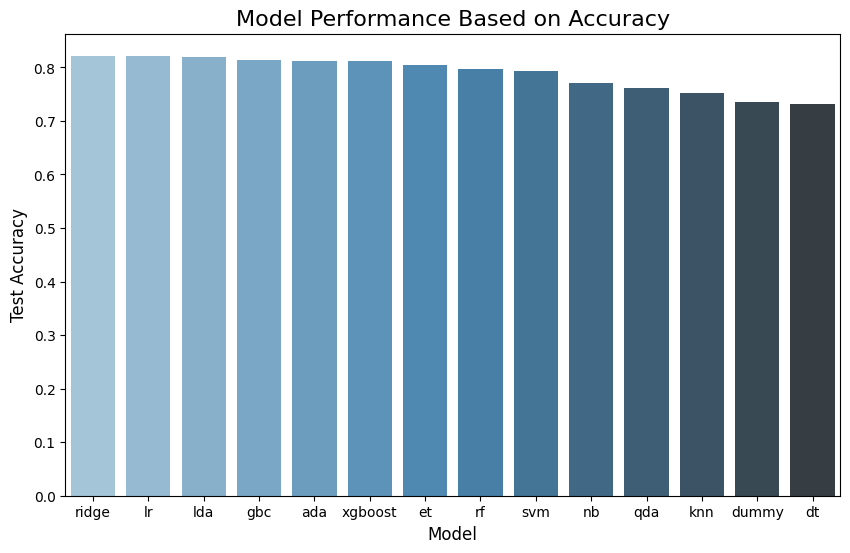

In [ ]:
# Membuat bar chart berdasarkan Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=performance_base, palette='Blues_d')

# Menambahkan label dan judul
plt.title('Model Performance Based on Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)

# Menampilkan plot
plt.show()

## SMOTE 50:50

In [ ]:
base_model_performance1 = evaluate_models(base_models, X_train_resampled_50_50, y_train_resampled_50_50, X_test, y_test)
performance_base1 = pd.DataFrame(base_model_performance1, columns=['Model', 'Train Accuracy_smote', 'Test Accuracy_smote'])
performance_base1 = performance_base1.sort_values(by='Test Accuracy_smote', ascending=False)
performance_base1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy_smote,Test Accuracy_smote
13,svm,0.810174,0.786373
9,qda,0.819599,0.784244
6,xgboost,0.869502,0.782115
3,gbc,0.866240,0.777147
1,ada,0.798937,0.775727
10,nb,0.783229,0.775018
0,lr,0.813195,0.771469
2,ridge,0.807637,0.770759
5,lda,0.807999,0.770759
7,et,0.790599,0.769340


<ipython-input-97-0ad8f2c39c2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy_smote', data=performance_base1, palette='Blues_d')


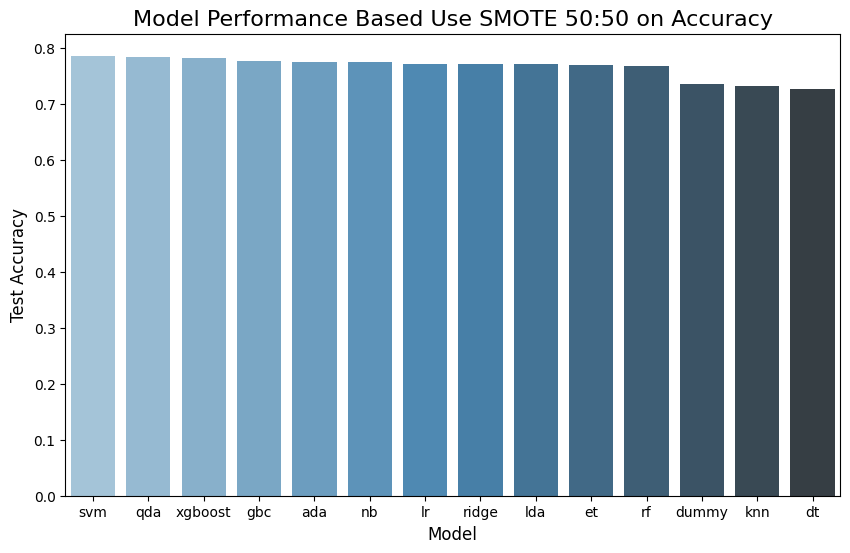

In [ ]:
# Membuat bar chart berdasarkan Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy_smote', data=performance_base1, palette='Blues_d')

# Menambahkan label dan judul
plt.title('Model Performance Based Use SMOTE 50:50 on Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)

# Menampilkan plot
plt.show()

## SMOTE 50:40

In [ ]:
base_model_performance2 = evaluate_models(base_models, X_train_resampled_50_40, y_train_resampled_50_40, X_test, y_test)
performance_base2 = pd.DataFrame(base_model_performance2, columns=['Model', 'Train Accuracy_smote', 'Test Accuracy_smote'])
performance_base2 = performance_base2.sort_values(by='Test Accuracy_smote', ascending=False)
performance_base2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy_smote,Test Accuracy_smote
4,rf,0.779672,0.797729
7,et,0.781149,0.794890
1,ada,0.791622,0.789212
2,ridge,0.802497,0.787793
13,svm,0.803169,0.787793
5,lda,0.802900,0.787083
6,xgboost,0.859023,0.787083
9,qda,0.809345,0.787083
3,gbc,0.860902,0.781405
0,lr,0.798335,0.774308


<ipython-input-98-96bea4d20efc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy_smote', data=performance_base2, palette='Blues_d')


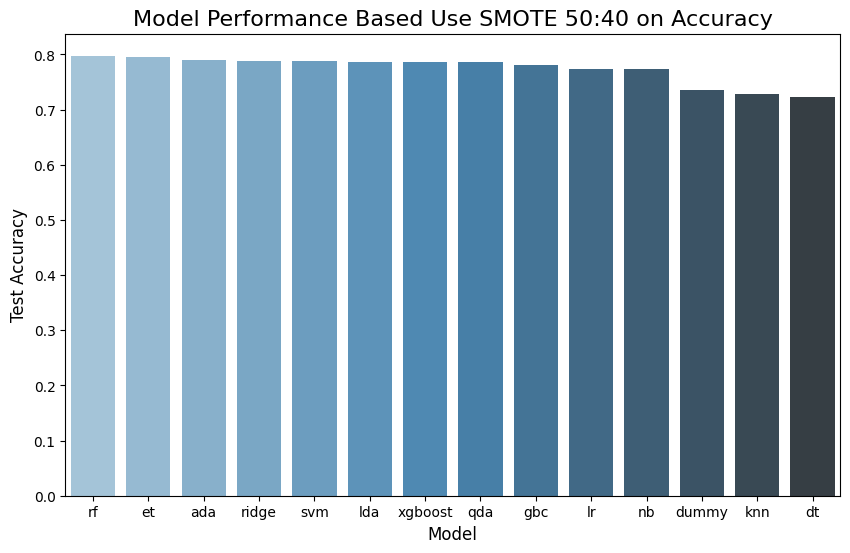

In [ ]:
# Membuat bar chart berdasarkan Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy_smote', data=performance_base2, palette='Blues_d')

# Menambahkan label dan judul
plt.title('Model Performance Based Use SMOTE 50:40 on Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)

# Menampilkan plot
plt.show()

## SMOTE 50:30

In [ ]:
base_model_performance3 = evaluate_models(base_models, X_train_resampled_50_30, y_train_resampled_50_30, X_test, y_test)
performance_base3 = pd.DataFrame(base_model_performance3, columns=['Model', 'Train Accuracy_smote', 'Test Accuracy_smote'])
performance_base3 = performance_base3.sort_values(by='Test Accuracy_smote', ascending=False)
performance_base3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy_smote,Test Accuracy_smote
4,rf,0.771601,0.814053
1,ada,0.783686,0.811214
7,et,0.760272,0.811214
5,lda,0.800000,0.804826
13,svm,0.800755,0.804826
2,ridge,0.800151,0.804116
6,xgboost,0.852115,0.798439
3,gbc,0.860272,0.794890
0,lr,0.793202,0.787793
9,qda,0.793656,0.785664


<ipython-input-99-913c96b8d091>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy_smote', data=performance_base3, palette='Blues_d')


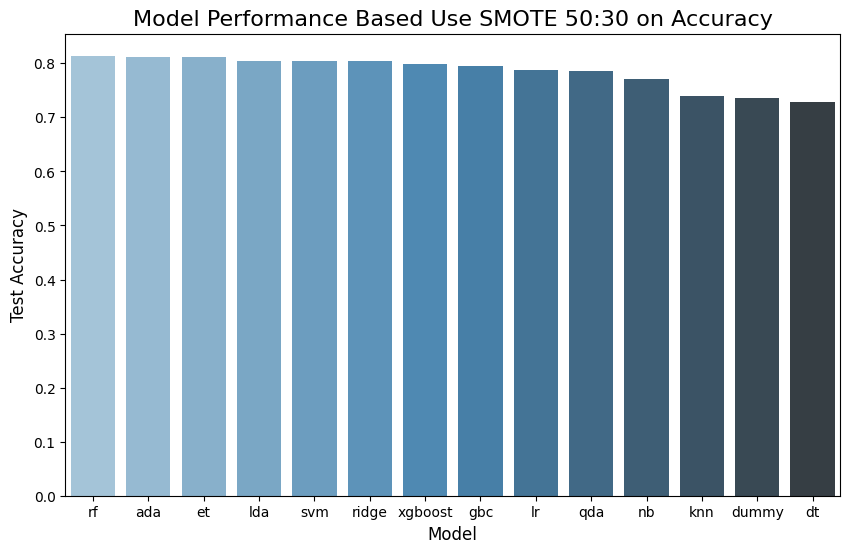

In [ ]:
# Membuat bar chart berdasarkan Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy_smote', data=performance_base3, palette='Blues_d')

# Menambahkan label dan judul
plt.title('Model Performance Based Use SMOTE 50:30 on Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)

# Menampilkan plot
plt.show()

# Grid Search Stacking

In [ ]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 52.1 MB/s eta 0:00:00


In [ ]:
# pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
base_models = [
    ('lr', LogisticRegression(solver='liblinear', random_state=42)),
    # ('xgboost', XGBClassifier(n_estimators=90, max_depth=4, learning_rate=0.2, random_state=42)),
    ('ridge', RidgeClassifier()),
    ('et', ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=42)),
    ('adaboost', AdaBoostClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('lda', LinearDiscriminantAnalysis())
]

# Meta-model Logistic Regression
meta_model = LogisticRegression()

In [ ]:
def evaluate_stacking_combinations(base_models, meta_model, X_train, y_train, X_test, y_test):
    results = []

    # Mencari semua kombinasi model dasar (gunakan r untuk menentukan ukuran kombinasi)
    for r in range(1, len(base_models) + 1):
        for comb in itertools.combinations(base_models, r):
            # Pastikan setiap kombinasi dimasukkan sebagai list (harus tuple of tuple, bukan tuple)
            comb_list = list(comb)  # Ubah tuple menjadi list

            # Membuat model Stacking dengan kombinasi dasar ini
            stacking = StackingClassifier(estimators=comb_list, final_estimator=meta_model)

            # Fit model
            stacking.fit(X_train, y_train)

            # Prediksi dan hitung metrik performa
            y_pred = stacking.predict(X_test)
            y_prob = stacking.predict_proba(X_test)[:, 1]  # Untuk AUC

            # Hitung metrik lainnya
            acc = accuracy_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            kappa = cohen_kappa_score(y_test, y_pred)
            mcc = matthews_corrcoef(y_test, y_pred)

            # Simpan hasil
            results.append({
                'combination': [model[0] for model in comb_list],
                'accuracy': acc,
                'AUC': auc,
                'Recall': recall,
                'Precision': precision,
                'F1': f1,
                'Kappa': kappa,
                'MCC': mcc
            })

    # Konversi hasil menjadi DataFrame untuk kemudahan analisis
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Grup
2142,0,0,0,1,21,1,0,-0.000474,-0.419967,0,...,1,0,0,1,1,0,0,0,1,0
1623,0,0,0,0,54,1,1,1.074754,1.256024,1,...,0,0,1,1,0,1,0,0,0,0
6074,1,0,1,0,1,0,1,-1.376499,-1.000343,0,...,0,0,0,0,0,0,0,1,0,0
1362,1,0,0,0,4,1,1,0.177346,-0.905555,0,...,0,0,0,0,0,0,0,1,0,1
6754,1,0,0,1,0,1,1,-0.098524,-0.983352,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,1,1.001632,-0.968725,0,...,0,0,1,1,0,0,0,1,0,1
5191,0,0,1,1,23,1,1,0.872006,-0.039266,1,...,1,1,1,1,0,1,1,0,0,0
5226,1,0,1,1,12,1,1,-1.452945,-0.875461,0,...,0,0,0,0,0,0,0,1,0,0
5390,1,1,0,0,12,1,1,1.149538,-0.480353,1,...,1,0,1,1,0,0,0,1,0,1


In [ ]:
y_train

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0
...,...
3772,1
5191,0
5226,0
5390,1


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5634, 24), (5634,), (1409, 24), (1409,))

In [ ]:
results_df = evaluate_stacking_combinations(base_models, meta_model, X_train, y_train, X_test, y_test)

best_combinations = results_df.sort_values(by='accuracy', ascending=False)
best_combinations.head(30)

,combination,accuracy,AUC,Recall,Precision,F1,Kappa,MCC
22,"[lr, ridge, adaboost]",0.829666,0.863073,0.597855,0.712460,0.650146,0.538711,0.542329
45,"[lr, ridge, adaboost, lda]",0.828957,0.863407,0.597855,0.710191,0.649199,0.537207,0.540689
41,"[lr, ridge, et, adaboost]",0.828957,0.863114,0.597855,0.710191,0.649199,0.537207,0.540689
25,"[lr, et, adaboost]",0.828247,0.863081,0.592493,0.710611,0.646199,0.534024,0.537871
57,"[lr, ridge, et, adaboost, lda]",0.828247,0.863704,0.595174,0.709265,0.647230,0.534867,0.538459
44,"[lr, ridge, adaboost, gbc]",0.827537,0.864677,0.584450,0.712418,0.642121,0.529969,0.534476
8,"[lr, adaboost]",0.827537,0.862951,0.592493,0.708333,0.645255,0.532522,0.536227
42,"[lr, ridge, et, gbc]",0.826828,0.865047,0.584450,0.710098,0.641176,0.528464,0.532816
26,"[lr, et, gbc]",0.826828,0.865997,0.584450,0.710098,0.641176,0.528464,0.532816
48,"[lr, et, adaboost, lda]",0.826828,0.863665,0.595174,0.704762,0.645349,0.531869,0.535193


# Stacking

In [ ]:
base_models = [
    ('adaboost', AdaBoostClassifier(random_state=42)),
    ('ridge', RidgeClassifier()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
]

# Meta-model
meta_model = LogisticRegression(random_state=42)

# Inisialisasi StackingClassifier
best_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [ ]:
best_model.fit(X_train, y_train)

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (mean): {cv_scores.mean():.4f}")
print(f"Cross-Validation Accuracy (std): {cv_scores.std():.4f}")
eval_classification(best_model)

Cross-Validation Accuracy (mean): 0.8019
Cross-Validation Accuracy (std): 0.0096
Accuracy (Test Set): 0.8297
Accuracy (Train Set): 0.8028
Precision (Test Set): 0.7125
Precision (Train Set): 0.6670
Recall (Test Set): 0.5979
Recall (Train Set): 0.5140
F1-Score (Test Set): 0.6501
F1-Score (Train Set): 0.5806
ROC-AUC (Test Set): 0.8631
ROC-AUC (Train Set): 0.8469
Recall (Cross-validated Test Set): 0.5286
Recall (Cross-validated Train Set): 0.5296
Precision (Cross-validated Test Set): 0.6691
Precision (Cross-validated Train Set): 0.6732


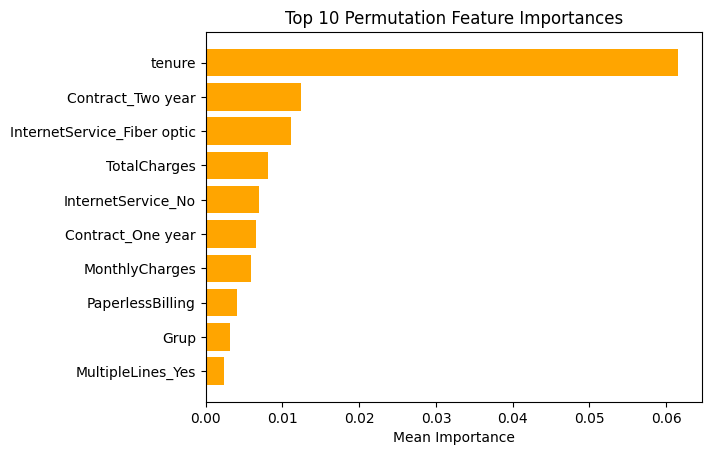

In [ ]:
# Calculate permutation importance
result = permutation_importance(best_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42)
importance = result.importances_mean

# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importance = importance[sorted_idx]

# Ambil 10 fitur terbaik
top_n = 10
top_features = sorted_features[:top_n]
top_importance = sorted_importance[:top_n]

# Plot 10 fitur terbaik
plt.barh(top_features, top_importance, color='orange')
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} Permutation Feature Importances')
plt.xlabel('Mean Importance')
plt.show()

In [ ]:
pip install shap

In [ ]:
pip install --upgrade scikit-learn

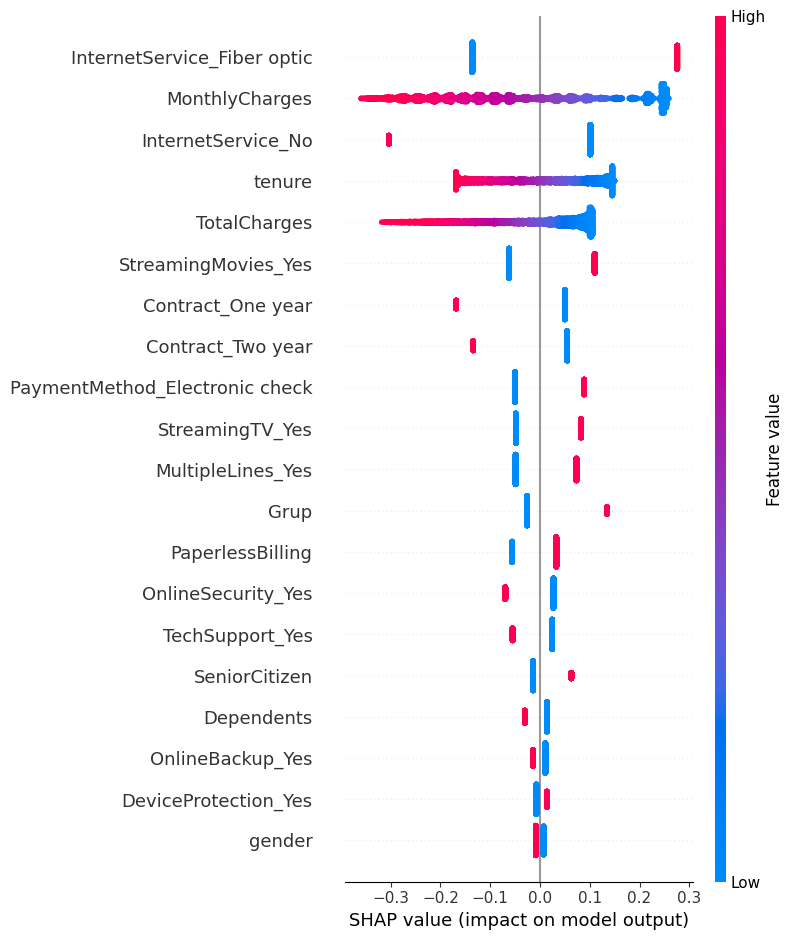

In [ ]:
import shap

# Gunakan SHAP Explainer umum (untuk model apapun, termasuk boosting)
explainer = shap.Explainer(ridge, X_train)

# Membuat SHAP summary plot
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.initjs()

# Membuat SHAP Force Plot untuk instance pertama
shap.plots.force(explainer.expected_value, shap_values[0], features=X_train.iloc[0], feature_names=X_train.columns)

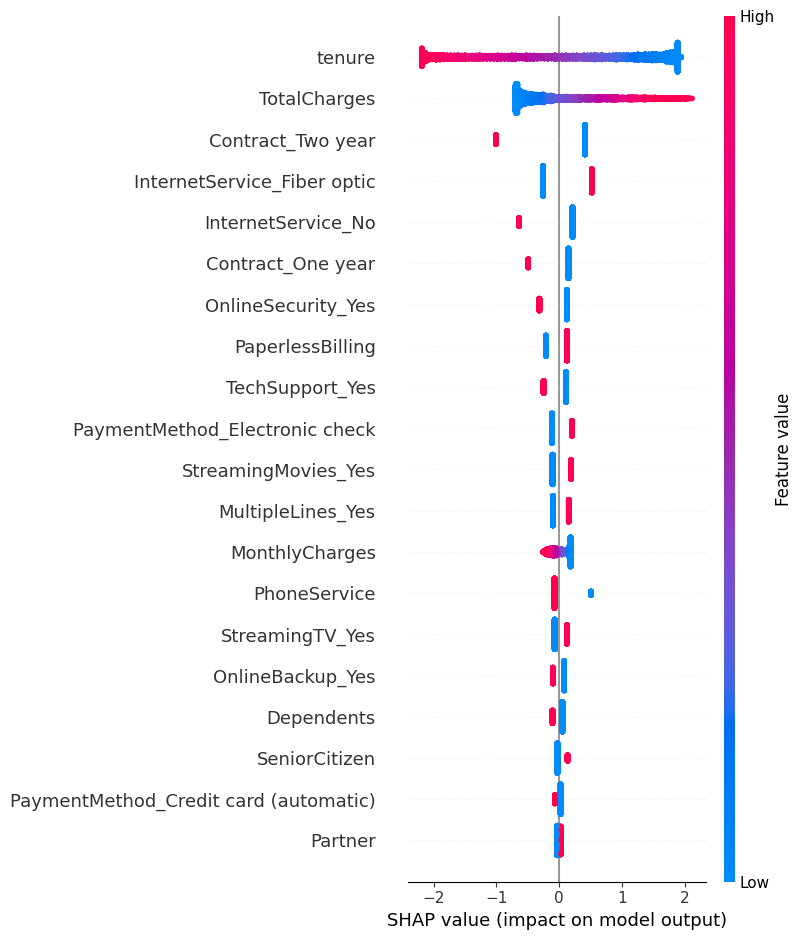

In [ ]:
import shap

# Gunakan SHAP Explainer umum (untuk model apapun, termasuk boosting)
explainer = shap.Explainer(logreg, X_train)

# Membuat SHAP summary plot
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)